In [1]:

import numpy as np
import matplotlib.pyplot as plt


# Punto 6

In [2]:
# Funciones definidas para el primer sistema

def GetVectorF_First(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1])
        
    return v

def GetJacobian_First(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (  G[i](r[0]+h,r[1]) - G[i](r[0]-h,r[1]) )/(2*h)
        J[i,1] = (  G[i](r[0],r[1]+h) - G[i](r[0],r[1]-h) )/(2*h)
        
    return np.transpose(J)

def NewtonRaphson_First(G,r,error=1e-10):
    
    it = 0
    d = 1
    Vector_d = np.array([])
    
    while d > error:
        
        it += 1
        
        rc = r
        
        F = GetVectorF_First(G,r)
        J = GetJacobian_First(G,r)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot( InvJ, F )
        
        diff = r - rc
        print(diff)
        
        d = np.linalg.norm(diff)
        
        Vector_d = np.append( Vector_d , d )
        
    return r,it,Vector_d


In [3]:
# Funciones definidas para el primer sistema

def GetVectorF_Second(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1],r[2])
        
    return v

def GetJacobian_Second(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (  G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]) )/(2*h)
        J[i,1] = (  G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]) )/(2*h)
        J[i,2] = (  G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h) )/(2*h)
        
    return J.T

def NewtonRaphson_Second(G,r,error=1e-10):
    
    it = 0
    d = 1
    Vector_d = np.array([])
    
    while d > error:
        
        it += 1
        
        rc = r
        
        F = GetVectorF_Second(G,r)
        J = GetJacobian_Second(G,r)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot( InvJ, F )
        
        diff = r - rc
        print(diff)
        
        d = np.linalg.norm(diff)
        
        Vector_d = np.append( Vector_d , d )
        
    return r,it,Vector_d


## Primer Sistema de Ecuaciones

In [4]:
# Definimos el sistema en una tupla
First_system = (lambda x,y: np.log10((x**2)+(y**2))-np.sin(x*y)-np.log10(2)-np.log10(np.pi), \
                lambda x,y: np.exp(x-y)+np.cos(x*y))

In [5]:
for i in range(2):
    print(First_system[i](2,2))

0.8617126139417566
0.34635637913638806


In [6]:
GetVectorF_First(First_system,[2,2])

array([0.86171261, 0.34635638])

In [7]:
GetJacobian_First(First_system,[2,2])

array([[1.52443448, 2.51360499],
       [1.52443448, 0.51360499]])

In [8]:
r1,it1,distancias1 = NewtonRaphson_First(First_system,[2,2])

[-0.14038754 -0.25767812]
[-0.05990333  0.00474771]
[-0.01423362  0.02382817]
[-0.00932383 -0.00410989]
[-0.00132467  0.00663349]
[-0.00200853 -0.00265623]
[0.000157   0.00236033]
[-0.00055755 -0.00127782]
[0.00018049 0.00093282]
[-0.00019013 -0.00056622]
[9.46409852e-05 3.84710406e-04]
[-7.32241148e-05 -2.43858153e-04]
[4.29935708e-05 1.61305264e-04]
[-2.98484682e-05 -1.03935196e-04]
[1.86760019e-05 6.80601614e-05]
[-1.24555780e-05 -4.41262568e-05]
[7.98516564e-06 2.87852740e-05]
[-5.24554077e-06 -1.87066006e-05]
[3.39422291e-06 1.21853721e-05]
[-2.21691092e-06 -7.92595722e-06]
[1.43959127e-06 5.16007060e-06]
[-9.38192796e-07 -3.35750766e-06]
[6.10062277e-07 2.18539035e-06]
[-3.97246632e-07 -1.42215640e-06]
[2.58446115e-07 9.25601424e-07]
[-1.68234271e-07 -6.02371368e-07]
[1.09474349e-07 3.92037228e-07]
[-7.12527968e-08 -2.55138575e-07]
[4.63696783e-08 1.66048062e-07]
[-3.01788174e-08 -1.08065219e-07]
[1.96402845e-08 7.03301513e-08]
[-1.27822564e-08 -4.57714822e-08]
[8.31875524e-09 2.

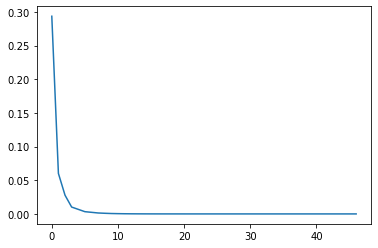

In [9]:
plt.plot(distancias1)

In [10]:
print(r1)

[1.77245385 1.77245385]


## Segundo Sistema de Ecuaciones

In [11]:
# Definimos el segundo sistema en una tupla
Second_system = (lambda x,y,z: 6*x-2*np.cos(y*z)-1,    \
                 lambda x,y,z: 9*y+np.sqrt((x**2)+np.sin(z)+1.06)+0.9,    \
                 lambda x,y,z: 60*z+3*np.exp(-x*y)+10*np.pi-3)

In [12]:
for i in range(3):
    print(Second_system[i](0,0,0))

-3.0
1.9295630140987
31.41592653589793


In [13]:
GetVectorF_Second(Second_system,[0,0,0])

array([-3.        ,  1.92956301, 31.41592654])

In [14]:
GetJacobian_Second(Second_system,[0,1,-1])

array([[ 6.        ,  0.        , -3.        ],
       [ 1.68294197,  9.        ,  0.        ],
       [-1.68294197,  0.57789944, 60.        ]])

In [15]:
r2,it2,distancias2 = NewtonRaphson_Second(Second_system,[0,0,0])

[ 0.5        -0.21439589 -0.52186344]
[-0.00238106  0.01288117 -0.00749826]
[0.00024297 0.00205967 0.00047268]
[ 2.87757327e-04 -1.13360672e-04  7.14204832e-05]
[ 2.08603051e-07 -3.95328587e-05 -7.08199208e-06]
[-5.19275201e-06  1.33730455e-06 -1.42170847e-06]
[-9.77612319e-08  7.39309225e-07  1.02405968e-07]
[ 9.21706162e-08 -1.08171067e-08  2.75706463e-08]
[ 3.43583895e-09 -1.35697276e-08 -1.35376188e-09]
[-1.60520347e-09 -4.97944741e-11 -5.23240118e-10]
[-9.11919984e-11  2.44574361e-10  1.50240931e-11]
[2.73883694e-11 5.32510147e-12 9.73710002e-12]


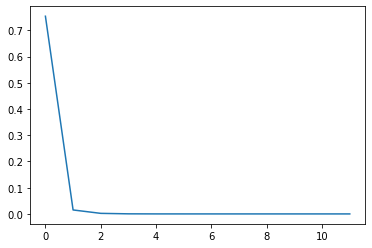

In [16]:
plt.plot(distancias2)

In [17]:
print(r2)

[ 0.49814468 -0.1996059  -0.52882598]
